In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from keras import models, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:


from sklearn.model_selection import train_test_split



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/time_series_19-covid-Confirmed.csv')

In [9]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,NaN,Somalia,5.1521,46.1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
459,NaN,Tanzania,-6.3690,34.8888,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
460,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
461,Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [22]:
# df1 = df[]
df_days = df[df.columns[4:]]
df1 = df.T[4:]

In [33]:
df_days1 = [list(df_days[i]) for i in df_days.columns]
len(df_days1)

55

In [57]:
df1['Confirmed'] = list(map(lambda x:sum(x), df_days1))
# df1 = df1.reset_index()
# df_1 = df1[['index','Confirmed']].rename(columns={'index':'Date'}).set_index('Date').reset_index().reset_index()
df1 = df_1[['index','Confirmed']].rename(columns={'index':'Ticks'}).set_index('Ticks')
df1

,Confirmed
Ticks,
0,555
1,653
2,941
3,1434
4,2118
5,2927
6,5578
7,6166
8,8234


In [58]:
train, test = df1[:-25], df1[-25:]
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [122]:
n_input = 1
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=90)

Epoch 1/90
5/5 [==============================] - 1s 106ms/step - loss: 0.3353
Epoch 2/90
5/5 [==============================] - 0s 10ms/step - loss: 0.3118
Epoch 3/90
5/5 [==============================] - 0s 9ms/step - loss: 0.2971
Epoch 4/90
5/5 [==============================] - 0s 8ms/step - loss: 0.2827
Epoch 5/90
5/5 [==============================] - 0s 11ms/step - loss: 0.2670
Epoch 6/90
5/5 [==============================] - 0s 9ms/step - loss: 0.2574
Epoch 7/90
5/5 [==============================] - 0s 10ms/step - loss: 0.2420
Epoch 8/90
5/5 [==============================] - 0s 9ms/step - loss: 0.2268
Epoch 9/90
5/5 [==============================] - 0s 7ms/step - loss: 0.2140
Epoch 10/90
5/5 [==============================] - 0s 9ms/step - loss: 0.2052
Epoch 11/90
5/5 [==============================] - 0s 7ms/step - loss: 0.1950
Epoch 12/90
5/5 [==============================] - 0s 9ms/step - loss: 0.1801
Epoch 13/90
5/5 [==============================] - 0s 9ms/step - los

In [123]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [126]:
[
    [pred_list[i]
    ]]

[[array([0.97149694], dtype=float32)]]

In [120]:
batch[0][1][0

0.0664049073266175

In [124]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),                           index=df[-n_input:].index, columns=['Prediction'])
df_test = pd.concat([df1,df_predict], axis=1)

In [62]:
df_test

,Confirmed,Prediction
0,555.0,NaN
1,653.0,NaN
2,941.0,NaN
3,1434.0,NaN
4,2118.0,NaN
...,...,...
458,NaN,109909.867655
459,NaN,113576.525481
460,NaN,117409.388874
461,NaN,121439.278723


No handles with labels found to put in legend.


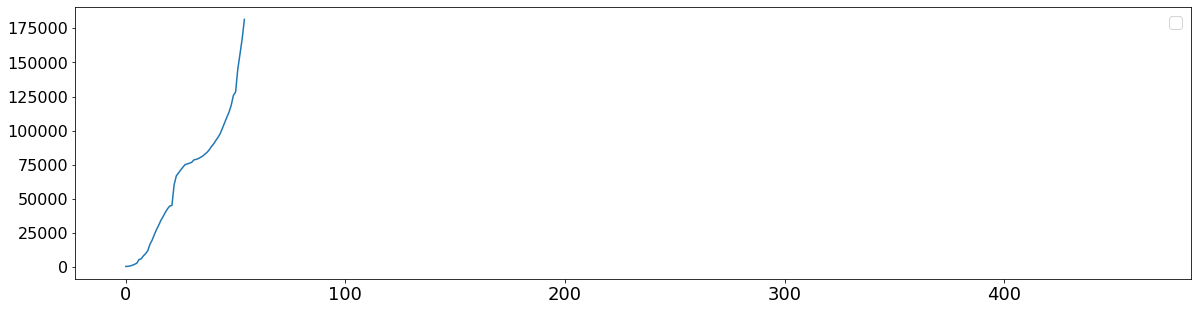

In [125]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Confirmed'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [69]:
data = df1.reset_index()
data

,Ticks,Confirmed
0,0,555
1,1,653
2,2,941
3,3,1434
4,4,2118
5,5,2927
6,6,5578
7,7,6166
8,8,8234
9,9,9927


In [70]:
from keras import models, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [133]:
scaler = MinMaxScaler()
scaled = scaler.fit(data[['Confirmed']]).transform(data[['Confirmed']])
data['scaled'] = scaled
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True,input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['mae','acc'])
# model.compile(loss=‘mean_squared_error’,
            #   optimizer=‘sgd’,
            #   metrics=[‘mae’, ‘acc’])
n_features = 1
X = np.array(data[['Ticks']])
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = np.array(data['scaled'])
model.fit(data.Ticks,data.Confirmed, epochs=20, verbose=0)
x_input = np.array(data[['Ticks']])
x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))
yhat = model.predict(x_input, verbose=0)
scaler.inverse_transform(yhat)[0:10]
scaler.inverse_transform(data[['scaled']])[0:10]

array([[ 555.],
       [ 653.],
       [ 941.],
       [1434.],
       [2118.],
       [2927.],
       [5578.],
       [6166.],
       [8234.],
       [9927.]])

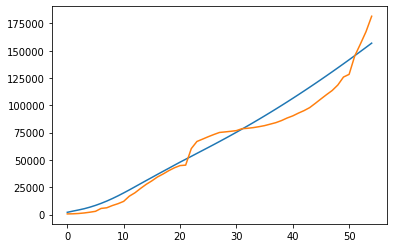

In [134]:
plt.plot(scaler.inverse_transform(yhat))
plt.plot(scaler.inverse_transform(data[['scaled']]))

In [139]:

model.evaluate(x_input.reshape((x_input.shape[0],x_input.shape[1],1)),data['scaled'])
# acc = accuracy_score(ytrue,ypred)
# acc

55/55 [==============================] - 0s 197us/step


[0.003194495586847717, 0.04641485959291458, 0.036363635212183]

In [138]:
model.metrics_names

['loss', 'mae', 'acc']

In [109]:
ypred1 = scaler.inverse_transform(yhat)
ytrue1 = scaler.inverse_transform(data[['scaled']])

In [141]:
from keras.metrics import accuracy

accuracy(y,yhat)

<tf.Tensor: shape=(55, 55), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [145]:
x_noscale = np.array(data[['Ticks']]).reshape((np.array(data[['Ticks']]).shape[0],np.array(data[['Ticks']]).shape[1],1))
y_noscale = np.array(data.Confirmed)
model.fit(x_noscale,y_noscale, epochs=20, verbose=0)
# x_input = np.array(data[['Ticks']])
# x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))
yhat_noscale = model.predict(x_noscale, verbose=0)
# scaler.inverse_transform(yhat)[0:10]
# scaler.inverse_transform(data[['scaled']])[0:10]

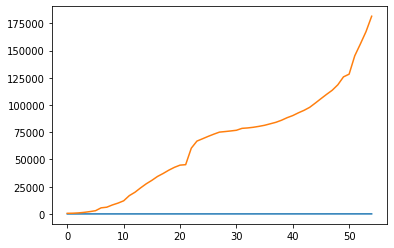

In [146]:
plt.plot(yhat_noscale)
plt.plot(y_noscale)

In [147]:
model.evaluate(x_noscale,y_noscale)

55/55 [==============================] - 0s 171us/step


[6461080333.963636, 65966.8671875, 0.0]